In [1]:
from notebook_functions import adstock, s_curve, create_transformed_tables, plot_stacked_area_with_actual, plot_transformed_vs_raw, plot_data_set
import pandas as pd

# Load CSVs as dataframes

df_data = pd.read_csv('Data/df_data.csv', index_col=0, parse_dates=True)
df_trans = pd.read_csv('Data/df_trans.csv', index_col=0, parse_dates=True)
df_values = pd.read_csv('Data/df_values.csv', index_col=0, parse_dates=True)

# df_data.head(), df_trans.head(), df_values.head()

In [2]:
import statsmodels.api as sm

# Prepare X and y for regression
X = df_trans.copy()
# Remove columns not needed (if any)
X = X[[col for col in X.columns if col != 'actual' and col != 'error']]
y = df_values['actual']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit OLS regression
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 actual   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     42.39
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           7.03e-30
Time:                        23:13:00   Log-Likelihood:                -225.00
No. Observations:                 156   AIC:                             464.0
Df Residuals:                     149   BIC:                             485.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c               99.8876      1.260     79.271   

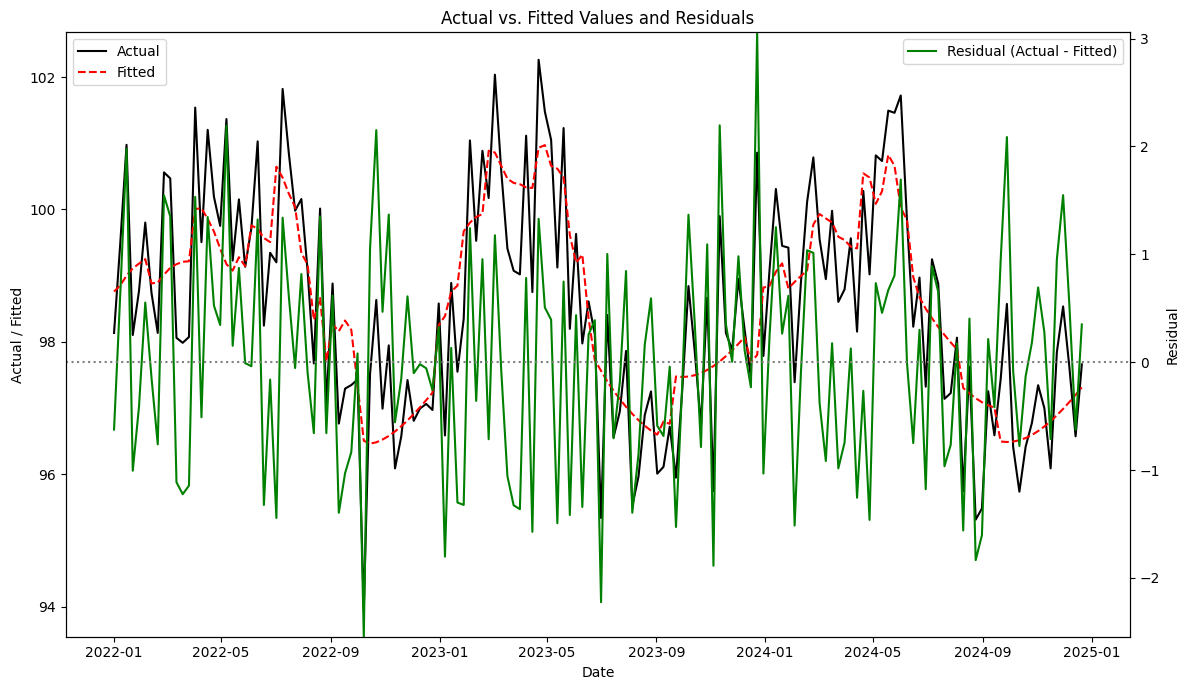

In [7]:
import matplotlib.pyplot as plt

# Get fitted values from the model
fitted = model.fittedvalues
actual = y
residual = actual - fitted

plt.figure(figsize=(12, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(actual.index, actual, label='Actual', color='black', linestyle='-')
ax1.plot(actual.index, fitted, label='Fitted', color='red', linestyle='--')
ax2.plot(actual.index, residual, label='Residual (Actual - Fitted)', color='green', linestyle='-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Actual / Fitted')
ax2.set_ylabel('Residual')

# Scale residual axis so residuals are shown below actual/fitted
resid_min = min(residual.min(), 0)
resid_max = max(residual.max(), 0)
ax2.set_ylim(resid_min, resid_max)
ax2.axhline(0, color='gray', linestyle=':')

plt.title('Actual vs. Fitted Values and Residuals')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()